# Kevin Phung, 47881547

## Problem 1: Decision Trees

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# 1 Decision Trees

# 1a) Entropy of Y = 6/10log(10/6) + 4/10log(10/4)
#       0.44218 + 0.52877 = 0.97095 bits

# 1b) Information gain for each variable Xi.
#   X1 =  0.97095 - (4/10(3/4log(4/3)+1/4log(4)) 
#               + 6/10(1/2log(2) + 1/2log(2)))
#      = 0.97095 - (0.32451 +0.6) = 0.04644 bits 
#   X2 = 0.97095 - (5/10(1/5log(5)+4/5log(5/4)) 
#               + 5/10(6log6 + 0log0))
#      = 0.97095 -  (0.36096 + 0) = 0.60999 bits
#   X3 = 0.97095 - (3/10(2/3log(3/2)+1/3log(3)) + 7/10(4/7log(7/4)
#               + 3/7log(7/3 )
#      = 0.97095 - (0.27548 + 0.68965) = 0.00582
#   X4 = 0.97095 - (3/10(1/3log(3)+2/3log(3/2))
#               +7/10(5/7log(7/5)+2/7log(7/2)))
#      = 0.97095 - (0.27548 + 0.60418) = 0.09129
#   X5 = 0.97095 - (7/10(4/7log(7/4)+3/7log(7/3))
#               +3/10(2/3log(3/2)+1/3log(3)))
#      = 0.97095 - (0.68965 + 0.27548) = 0.00582

# 1c)  Draw Complete Decision Tree
#                               (X2)
#                            /        \ 
#                          0            1
#                      (X1)            [Y=-1]
#                   /      \ 
#                  0        1
#                (X4)       [Y=1]
#             /        \ 
#           0           1
#       [Y=1]           [Y=-1]

## Problem 2: Decision Trees on Kaggle

In [2]:
# 2 Decision Trees on Kaggle
# Part A Load Data and Validation Set

dataX = np.genfromtxt("X_train.txt",delimiter=None)
dataY = np.genfromtxt("Y_train.txt",delimiter=None)

# Take first 10,000 as training data.
Xtr = dataX[0:10000,:]    # not sure if should do "0:2" or ":", plotclassify2d needs "0:2"
#print("2d = ",np.atleast_2d(Xtr).shape[1])
Ytr = dataY[0:10000:]  

# Take second 10,000 as test/validation set.
Xte = dataX[10000:20000,:]
Yte = dataY[10000:20000:]

# Part B Learn a decision tree classifier
learnerTR = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50)

mseTR = learnerTR.err(Xtr,Ytr)
mseTE = learnerTR.err(Xte,Yte)

print("maxDepth = 50 | Error of Training Data = "+str(mseTR)
    +" | Error of Test Data = "+str(mseTE))


maxDepth = 50 | Error of Training Data = 0.0047 | Error of Test Data = 0.3779


maxDepth = 0 | Error of Training Data = 0.3418 | Error of Test Data = 0.3419
maxDepth = 1 | Error of Training Data = 0.3418 | Error of Test Data = 0.3419
maxDepth = 2 | Error of Training Data = 0.3223 | Error of Test Data = 0.3191
maxDepth = 3 | Error of Training Data = 0.3133 | Error of Test Data = 0.3126
maxDepth = 4 | Error of Training Data = 0.3105 | Error of Test Data = 0.3152
maxDepth = 5 | Error of Training Data = 0.3008 | Error of Test Data = 0.3102
maxDepth = 6 | Error of Training Data = 0.2949 | Error of Test Data = 0.31
maxDepth = 7 | Error of Training Data = 0.2872 | Error of Test Data = 0.3119
maxDepth = 8 | Error of Training Data = 0.2768 | Error of Test Data = 0.3129
maxDepth = 9 | Error of Training Data = 0.2632 | Error of Test Data = 0.3187
maxDepth = 10 | Error of Training Data = 0.2456 | Error of Test Data = 0.3252
maxDepth = 11 | Error of Training Data = 0.2309 | Error of Test Data = 0.3254
maxDepth = 12 | Error of Training Data = 0.21 | Error of Test Data = 0.3358


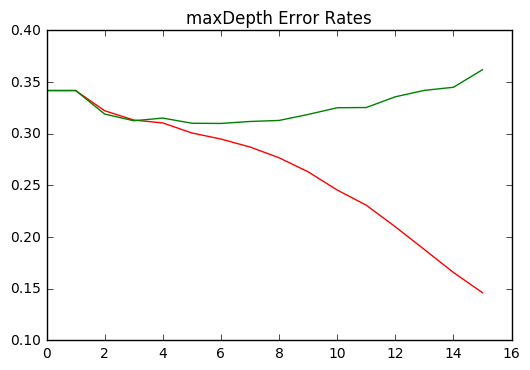

In [3]:
# Part C Test with Depths 0:15
mseTRL = []
mseTEL = []
for i in range(0,16):
    learner2TR = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=i)

    mseTR2 = learner2TR.err(Xtr,Ytr)
    mseTE2 = learner2TR.err(Xte,Yte)
    mseTRL.append(mseTR2)
    mseTEL.append(mseTE2)
    print("maxDepth = "+str(i)+ " | Error of Training Data = "
          +str(mseTR2)+" | Error of Test Data = "+str(mseTE2))

_,axis = plt.subplots()
plt.title("maxDepth Error Rates")
axis.plot(mseTRL, c='red')
axis.plot(mseTEL, c='green')
plt.show()

# Complexity increases as depth increases. The most ideal depth is 
# a depth of 6 because it has the lowest test data error. Depth lower
# than 6 is underfitting while depth over 6 is overfitting. MaxDepth = 6
# is the optimal depth because it is right before the learner starts to 
# overfit.
   
print("")

minLeaf = 4 | Error of Training Data = 0.0951 | Error of Test Data = 0.3815
minLeaf = 8 | Error of Training Data = 0.1691 | Error of Test Data = 0.3749
minLeaf = 16 | Error of Training Data = 0.2262 | Error of Test Data = 0.3549
minLeaf = 32 | Error of Training Data = 0.2637 | Error of Test Data = 0.3335
minLeaf = 64 | Error of Training Data = 0.2899 | Error of Test Data = 0.3274
minLeaf = 128 | Error of Training Data = 0.3012 | Error of Test Data = 0.3119
minLeaf = 256 | Error of Training Data = 0.3085 | Error of Test Data = 0.3172
minLeaf = 512 | Error of Training Data = 0.3135 | Error of Test Data = 0.3127
minLeaf = 1024 | Error of Training Data = 0.3223 | Error of Test Data = 0.3191
minLeaf = 2048 | Error of Training Data = 0.3418 | Error of Test Data = 0.3419
minLeaf = 4096 | Error of Training Data = 0.3418 | Error of Test Data = 0.3419


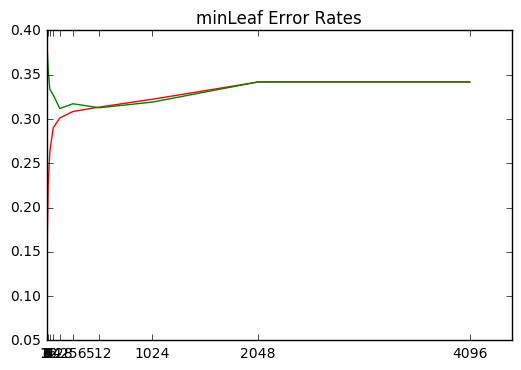

In [4]:
# Part D Test with minLeaf 2^[2:12]
mseTRL = []
mseTEL = []
for j in range(2,13):
    learnerTR = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minLeaf=2**j)
    mseTR2 = learnerTR.err(Xtr,Ytr)
    mseTE2 = learnerTR.err(Xte,Yte)
    mseTRL.append(mseTR2)
    mseTEL.append(mseTE2)
    print("minLeaf = "+str(2**j)+ " | Error of Training Data = "
          +str(mseTR2)+" | Error of Test Data = "+str(mseTE2))

_,axis = plt.subplots()
plt.title("minLeaf Error Rates")
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTRL, c='red')
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTEL, c='green')
axis.set_xticks([4,8,16,32,64,128,256,512,1024,2048,4096])
plt.show()    
    
# Complexity decreases as the minLeaf increases because the training
# data error continues to increase with higher minLeaf. The most ideal
# minLeaf is 128 because thats where the test data error is the lowest.
# minLeaf lower than 128 is overfitting the model while minLeaf higher
# is underfitting.  

print("")


minParent = 4 | Error of Training Data = 0.0235 | Error of Test Data = 0.3749
minParent = 8 | Error of Training Data = 0.0641 | Error of Test Data = 0.38
minParent = 16 | Error of Training Data = 0.1203 | Error of Test Data = 0.3721
minParent = 32 | Error of Training Data = 0.1808 | Error of Test Data = 0.3653
minParent = 64 | Error of Training Data = 0.2248 | Error of Test Data = 0.348
minParent = 128 | Error of Training Data = 0.2618 | Error of Test Data = 0.3354
minParent = 256 | Error of Training Data = 0.2814 | Error of Test Data = 0.3194
minParent = 512 | Error of Training Data = 0.302 | Error of Test Data = 0.3121
minParent = 1024 | Error of Training Data = 0.3078 | Error of Test Data = 0.3149
minParent = 2048 | Error of Training Data = 0.3218 | Error of Test Data = 0.3192
minParent = 4096 | Error of Training Data = 0.3418 | Error of Test Data = 0.3419


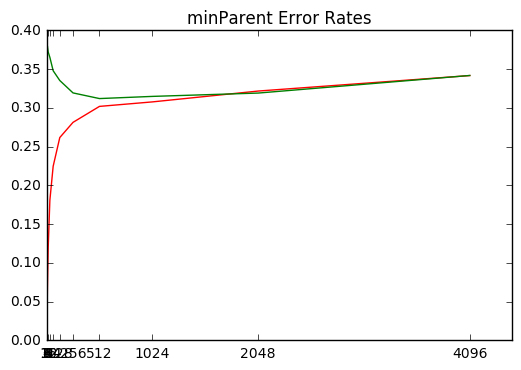

In [5]:
# Part E Test with minParent 2^[2:12]
mseTRL = []
mseTEL = []
for j in range(2,13):
    learnerTR = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50,minParent=2**j)
    mseTR2 = learnerTR.err(Xtr,Ytr)
    mseTE2 = learnerTR.err(Xte,Yte)
    mseTRL.append(mseTR2)
    mseTEL.append(mseTE2)
    print("minParent = "+str(2**j)+ " | Error of Training Data = "
          +str(mseTR2)+" | Error of Test Data = "+str(mseTE2))
_,axis = plt.subplots()
plt.title("minParent Error Rates")
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTRL, c='red')
axis.plot([4,8,16,32,64,128,256,512,1024,2048,4096],mseTEL, c='green')
axis.set_xticks([4,8,16,32,64,128,256,512,1024,2048,4096])
plt.show()    

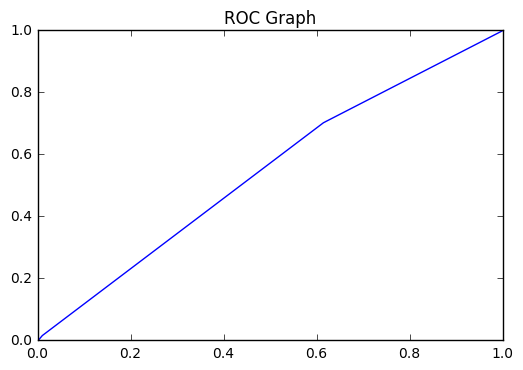

AUC for maxDepth=50 = 0.583537925638



In [6]:
# Part F ROC Curve and AUC for maxDepth=50
learnerTR = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=50)    
ROC = learnerTR.roc(Xte,Yte)
plt.plot(ROC[0],ROC[1])
plt.title("ROC Graph")
plt.show()
AUC = learnerTR.auc(Xte,Yte)
print("AUC for maxDepth=50 = "+str(AUC))
print("")


In [7]:
# Part G ROC Curve and AUC for best settings. 
# maxdepth=8 minLeaf=256 minParent512
nXte = np.genfromtxt("X_test.txt",delimiter=None)
learnerTR = ml.dtree.treeClassify(Xtr,Ytr,maxDepth=8,minLeaf=256
                                  ,minParent=512)  
Ypred = learnerTR.predictSoft(nXte)
np.savetxt('Yhat_dtree.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

## Problem 3: Random Forests

1 Ensemble Members: mseTR = 0.2409 | mseTE = 0.3709
5 Ensemble Members: mseTR = 0.127908 | mseTE = 0.240512
10 Ensemble Members: mseTR = 0.11798 | mseTE = 0.225298
25 Ensemble Members: mseTR = 0.11296304 | mseTE = 0.21663328


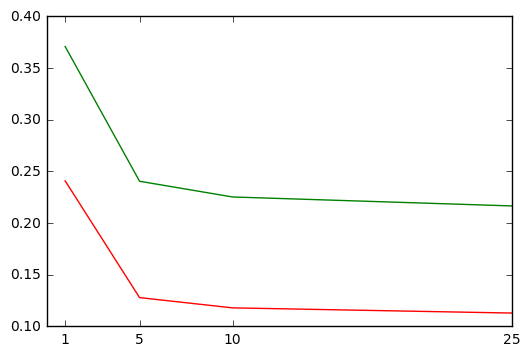

In [8]:
# Problem 3: Random Forests

# Part A
ensemble = [0]*25
Ytrhat = np.zeros((np.size(Ytr),25))
Ytehat = np.zeros((np.size(Yte),25))

# Evaluate for up to 25 learners.
for i in range(25):
    Xb,Yb = ml.bootstrapData(Xtr,Ytr)
    ensemble[i] = ml.dtree.treeClassify(Xb,Yb,maxDepth=15
            ,minLeaf=4,nFeatures=60)
    Ytrhat[:,i] = ensemble[i].predict(Xtr)
    Ytehat[:,i] = ensemble[i].predict(Xte)

# Write down mseTR and mseTE for learners [1,5,10,25]
mseTR = []
mseTE = []
for index, value in enumerate([1,5,10,25]):    
    mseTR.append(np.mean( (Ytr-np.mean(Ytrhat[:,0:value],1))**2 ))     
    mseTE.append(np.mean( (Yte-np.mean(Ytehat[:,0:value],1))**2 ))
    print(str(value)+" Ensemble Members: mseTR = "
          +str(mseTR[index])+" | mseTE = "+str(mseTE[index]))
    
_,axis = plt.subplots()

axis.plot([1,5,10,25],mseTR, c='red')
axis.plot([1,5,10,25],mseTE, c='green')
axis.set_xticks([1,5,10,25])
plt.show()


In [9]:
# Part B
ensemble2 = [0]*25
Xte = np.genfromtxt("X_test.txt",delimiter=None)
Ypred2 = np.zeros((np.size(Xte,0),1))
for i in range(25):
    Xb,Yb = ml.bootstrapData(Xtr,Ytr)
    ensemble2[i] = ml.dtree.treeClassify(Xb,Yb,maxDepth=8
            ,minLeaf=256,nFeatures=60,minParent=512)
    Ypred2 = Ypred2 + ensemble2[i].predictSoft(Xte)
Ypred2 = Ypred2/25
print("AUC after 25 learners = " + str(ensemble2[24].auc(Xb,Yb)))
np.savetxt('Ypred2.txt',
np.vstack( (np.arange(len(Ypred2)) , Ypred2[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');


AUC after 25 learners = 0.687753023516
